<a href="https://colab.research.google.com/github/scooobertdooobert/CS595A/blob/main/carbo_assign4_cls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Summary
The purpose of this assignment was to develop multi-class classification models to analyze the Wine dataset. This was done using two different configurations: the Support Vector Machine using linearSVC and the Support Vector Machine using SVC. The Wine dataset was imported and then preprocessed for use in each respective model. 

In [40]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Loading the Wine dataset and printing the shape, descrption, and average values

In [4]:
wine = load_wine()
df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
df["target"] = wine.target
print("First five rows of the data set: ")
df.head()

First five rows of the data set: 


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
print("Shape: ")
df.shape

Shape: 


(178, 14)

In [6]:
print("Min, Max, and Average Values of dataset: ")
df.describe()

Min, Max, and Average Values of dataset: 


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Creating the Scatter Matrix

Scatter Matrix: 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2ed535d90>,
      dtype=object)

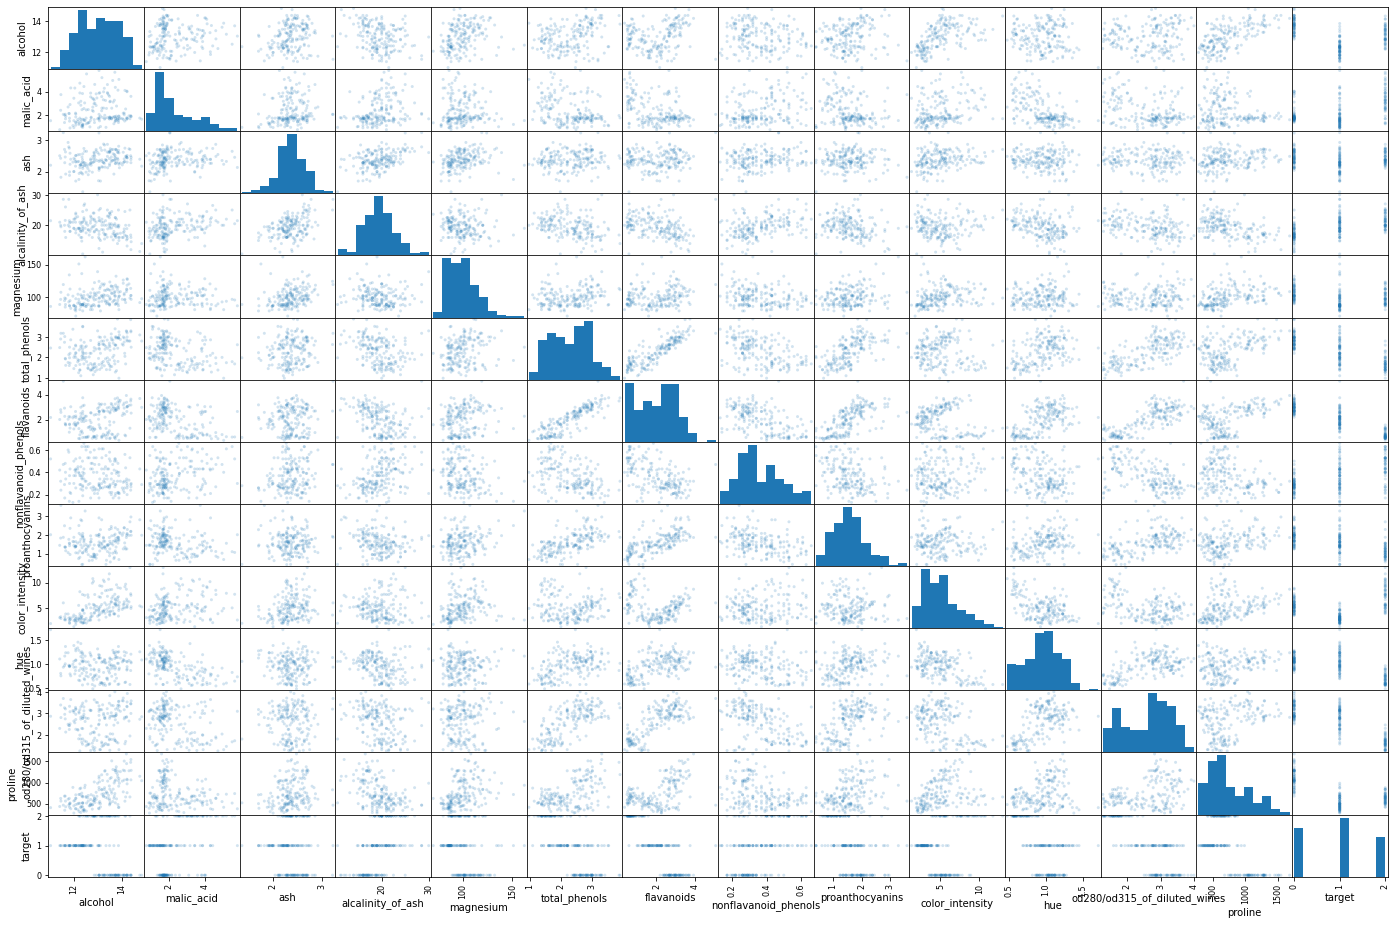

In [7]:
print("Scatter Matrix: ")
pd.plotting.scatter_matrix(df, figsize = (24,16), alpha = 0.2)

# Creating and Preprocessing training/testing datasets

In [25]:
np.random.seed(42)
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)


Removing any NULL and N/A values

In [26]:
incom_rows = df.isnull().any(axis=1).head()
incom_rows.dropna()
wine_labels = train_set["target"].copy()
wine_labels.head()

158    2
137    2
98     1
159    2
38     0
Name: target, dtype: int64

In [56]:
scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.fit_transform(test_set)

# Displaying the SVC model and performance metrics

SVC confusion matrix: 


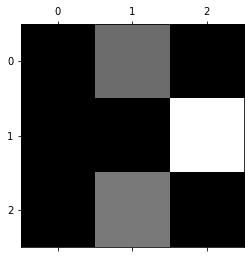

SVC performance: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.96      0.95      0.96        57
           2       0.93      0.97      0.95        40

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142



In [71]:
svc_model = SVC(C=1, gamma = 'auto')
svc_model.fit(train_set_scaled, wine_labels)

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(train_set_scaled, wine_labels)
y_train_pred = cross_val_predict(sgd_clf, train_set_scaled, wine_labels, cv=3)
print("SVC confusion matrix: ")
conf_mx = confusion_matrix(wine_labels, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

print("SVC performance: ")
print(classification_report(wine_labels, y_train_pred))

# Displaying the LinearSVC model and performance metrics

Linear SVC confusion matrix: 


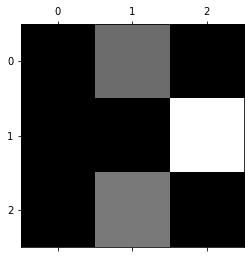

Linear SVC performance: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.96      0.95      0.96        57
           2       0.93      0.97      0.95        40

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142



In [68]:
linear_model = LinearSVC(C=1, loss = 'hinge')
linear_model.fit(train_set_scaled, wine_labels)

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(train_set_scaled, wine_labels)
y_train_pred = cross_val_predict(sgd_clf, train_set_scaled, wine_labels, cv=3)
print("Linear SVC confusion matrix: ")
conf_mx = confusion_matrix(wine_labels, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

print("Linear SVC performance: ")
print(classification_report(wine_labels, y_train_pred))